# **HVA Mini Hackathon 4.0: Historical Analysis of Summer Olympics Medals**

# **Importing the Python Modules:**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# **Importing the Data**

In [81]:
df = pd.read_csv('/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv',encoding='latin-1')

In [82]:
df.head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


# **Data Cleaning and Preparation**

In [83]:
for i in range(len(df)):
    try:
        lst = df['Athlete'][i].split()
        fname = lst[len(lst)-1]
        lname = lst[0]
        if len(lst) > 1:
            name = fname+' '+lname[0:-1]
            df.loc[i,'Athlete'] = name
        else:
            continue 
    except AttributeError:
        pass

In [84]:
df.isna().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [85]:
df.dropna(how='any',inplace = True, axis = 0)

In [86]:
df.isna().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [87]:
df['Year'] = [int(i) for i in df['Year']]

# Athlet Performance Metrices: 
>    **a. Evaluate the acheivements of athelets, identifying standout performers and their medal hauls.**

In [248]:
grouped_data_city = df.groupby(['City'])

In [194]:
top_athletes = dict()

In [195]:
for i,j in grouped_data_city:
    top_athletes[str(i)[2:-3]] = dict()
    top_athletes[str(i)[2:-3]]['Athlete'] = j['Athlete'].value_counts().idxmax()
    top_athletes[str(i)[2:-3]]['no_of_medals'] = dict(j['Athlete'].value_counts().sort_values(ascending=False)[:1])
    top_athletes[str(i)[2:-3]]['Country'] = j['Country'].value_counts().idxmax()
    top_athletes[str(i)[2:-3]]['year'] = j['Year'].value_counts().idxmax()

In [196]:
top = []
for i in top_athletes:
    top.append(top_athletes[i]['Athlete'])

In [197]:
for i,j in grouped_data_city:
    grouped_data_country = j.groupby(['Country'])
    for k,l in grouped_data_country:
        grouped_data_athlete  = l.groupby(['Athlete'])
        for m,n in grouped_data_athlete:
            if str(m)[2:-3] in top and len(n)>5: 
                top_athletes[str(i)[2:-3]]['sport'] = n['Sport'].value_counts().idxmax()
                top_athletes[str(i)[2:-3]]['medals']={'Gold':0,'Silver':0,'Bronze':0}
                temp_dict = dict(n['Medal'].value_counts())
                for medal in ["Gold","Silver","Bronze"]:
                    try:
                        top_athletes[str(i)[2:-3]]['medals'][medal] = temp_dict[medal]
                    except:
                        pass

In [198]:
for i,j in top_athletes.items():
    print(i)
    print(j)

Athens
{'Athlete': 'Michael PHELPS', 'no_of_medals': {'Michael PHELPS': 8}, 'Country': 'United States', 'year': 2004, 'sport': 'Aquatics', 'medals': {'Gold': 6, 'Silver': 0, 'Bronze': 2}}
Atlanta
{'Athlete': 'Alexei NEMOV', 'no_of_medals': {'Alexei NEMOV': 6}, 'Country': 'United States', 'year': 1996, 'sport': 'Gymnastics', 'medals': {'Gold': 2, 'Silver': 1, 'Bronze': 3}}
Barcelona
{'Athlete': 'Vitaly SCHERBO', 'no_of_medals': {'Vitaly SCHERBO': 6}, 'Country': 'United States', 'year': 1992, 'sport': 'Gymnastics', 'medals': {'Gold': 6, 'Silver': 0, 'Bronze': 0}}
Beijing
{'Athlete': 'Michael PHELPS', 'no_of_medals': {'Michael PHELPS': 8}, 'Country': 'United States', 'year': 2008, 'sport': 'Aquatics', 'medals': {'Gold': 8, 'Silver': 0, 'Bronze': 0}}
Los Angeles
{'Athlete': 'Ning LI', 'no_of_medals': {'Ning LI': 6}, 'Country': 'United States', 'year': 1984, 'sport': 'Gymnastics', 'medals': {'Gold': 3, 'Silver': 2, 'Bronze': 1}}
Montreal
{'Athlete': 'Nikolay ANDRIANOV', 'no_of_medals': {'Ni

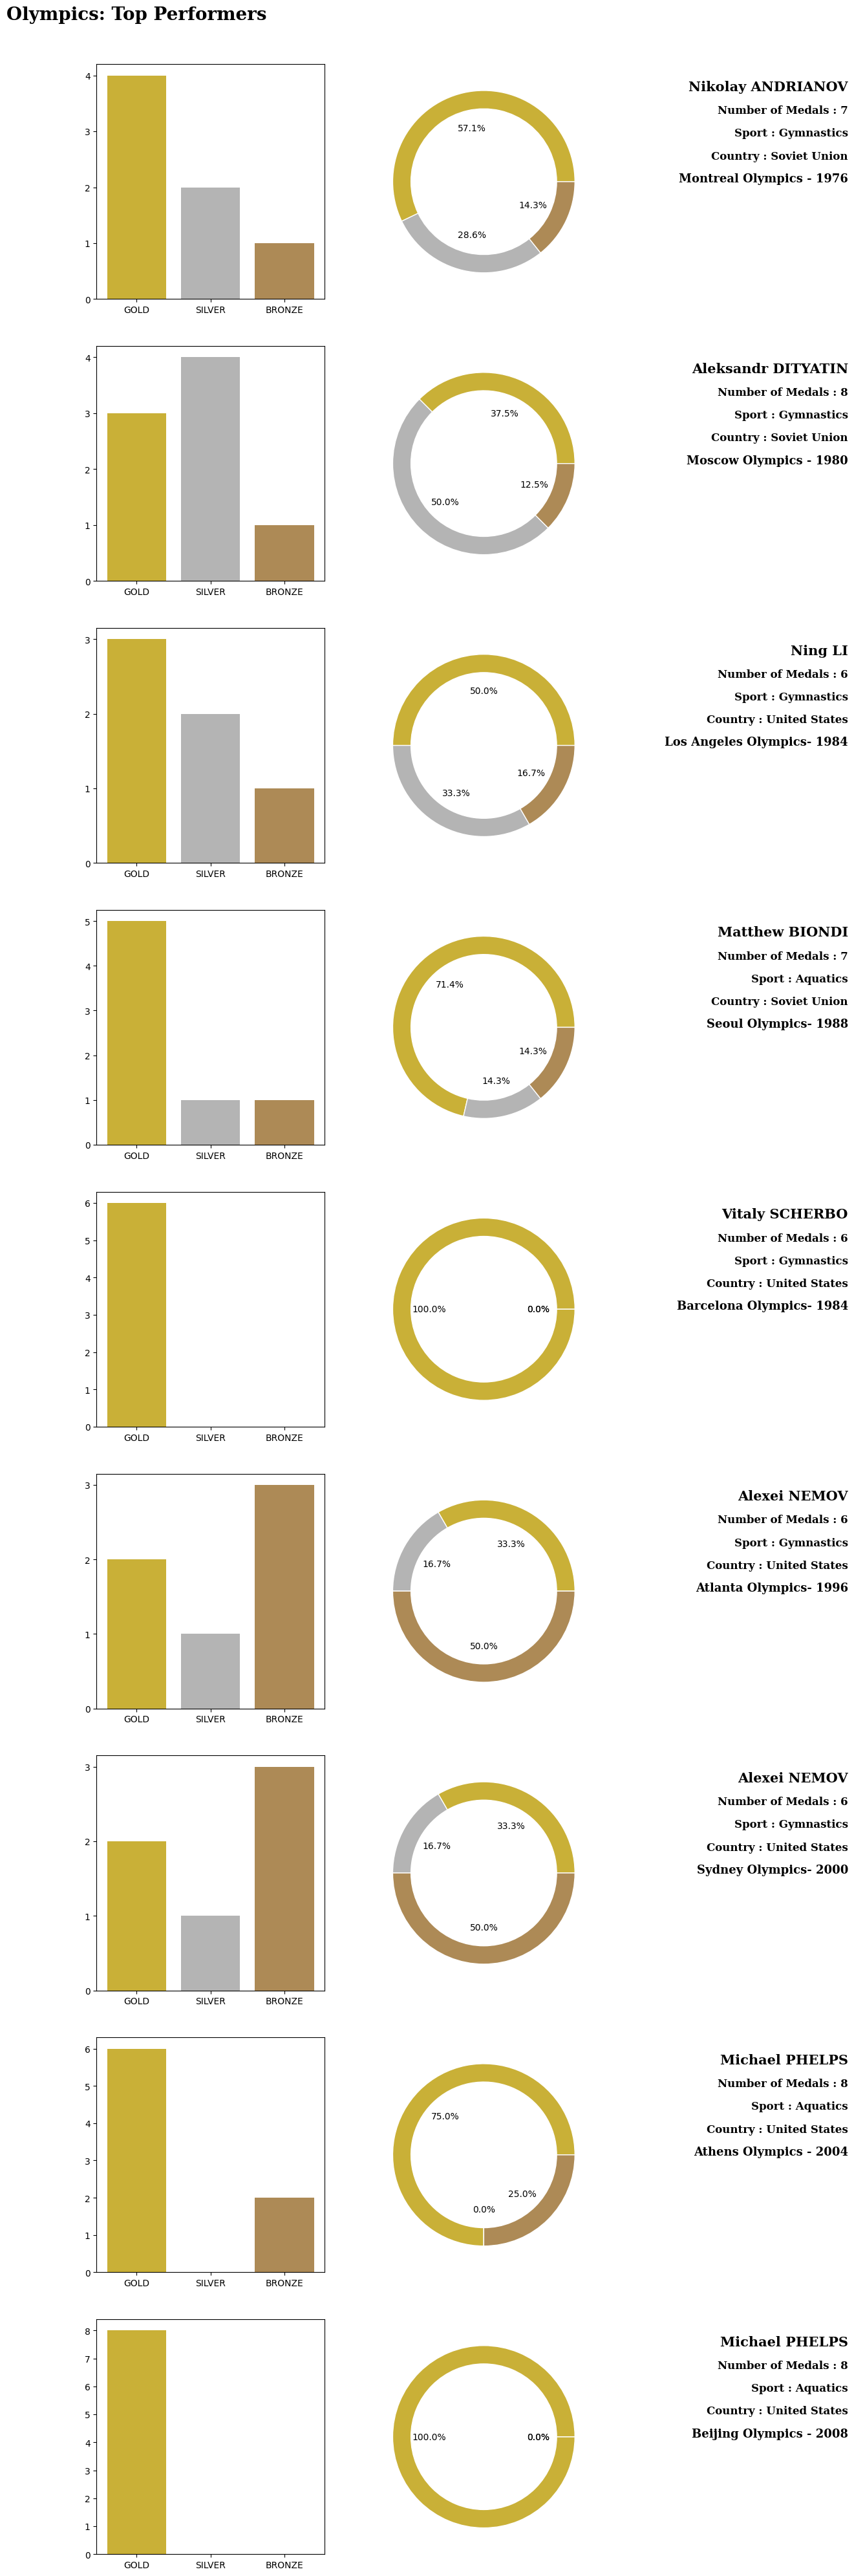

In [199]:
#Finding top performers

fig = plt.figure(figsize=(10,50))
gs = fig.add_gridspec(9, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[3,0])
ax8 = fig.add_subplot(gs[3,1])
ax9 = fig.add_subplot(gs[4,0])
ax10 = fig.add_subplot(gs[4,1])
ax11= fig.add_subplot(gs[5,0])
ax12= fig.add_subplot(gs[5,1])
ax13= fig.add_subplot(gs[6,0])
ax14= fig.add_subplot(gs[6,1])
ax15= fig.add_subplot(gs[7,0])
ax16= fig.add_subplot(gs[7,1])
ax17= fig.add_subplot(gs[8,0])
ax18= fig.add_subplot(gs[8,1])

#Top performers: Montreal 1976
ax1.text(0, 5, 'Olympics: Top Performers', fontsize=20, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax2.text(4, 0, 'Montreal Olympics - 1976', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax2.text(4, 0.25, f"Country : {top_athletes['Montreal']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax2.text(4, 0.5, f"Sport : {top_athletes['Montreal']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax2.text(4, 0.75, f"Number of Medals : {top_athletes['Montreal']['no_of_medals']['Nikolay ANDRIANOV']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax2.text(4, 1., 'Nikolay ANDRIANOV', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Montreal']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax2.pie(list(top_athletes['Montreal']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

#Top performers: Moscow 1980
ax4.text(4, 0, 'Moscow Olympics - 1980', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax4.text(4, 0.25, f"Country : {top_athletes['Moscow']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax4.text(4, 0.5, f"Sport : {top_athletes['Moscow']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax4.text(4, 0.75, f"Number of Medals : {top_athletes['Moscow']['no_of_medals']['Aleksandr DITYATIN']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax4.text(4, 1, 'Aleksandr DITYATIN', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax3.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Moscow']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax3.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax4.pie(list(top_athletes['Moscow']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

#Top performers: Los Angeles 1984
ax6.text(4, 0, 'Los Angeles Olympics- 1984', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax6.text(4, 0.25, f"Country : {top_athletes['Los Angeles']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax6.text(4, 0.5, f"Sport : {top_athletes['Los Angeles']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax6.text(4, 0.75, f"Number of Medals : {top_athletes['Los Angeles']['no_of_medals']['Ning LI']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax6.text(4, 1, 'Ning LI', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax5.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Los Angeles']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax5.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax6.pie(list(top_athletes['Los Angeles']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

#Top performers: Seoul 1988
ax8.text(4, 0, 'Seoul Olympics- 1988', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax8.text(4, 0.25, f"Country : {top_athletes['Seoul']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax8.text(4, 0.5, f"Sport : {top_athletes['Seoul']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax8.text(4, 0.75, f"Number of Medals : {top_athletes['Seoul']['no_of_medals']['Matthew BIONDI']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax8.text(4, 1, 'Matthew BIONDI', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax7.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Seoul']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax7.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax8.pie(list(top_athletes['Seoul']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

#Top performers: Barcelona 1984
ax10.text(4, 0, 'Barcelona Olympics- 1984', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax10.text(4, 0.25, f"Country : {top_athletes['Barcelona']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax10.text(4, 0.5, f"Sport : {top_athletes['Barcelona']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax10.text(4, 0.75, f"Number of Medals : {top_athletes['Barcelona']['no_of_medals']['Vitaly SCHERBO']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax10.text(4, 1, 'Vitaly SCHERBO', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax9.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Barcelona']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax9.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax9.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax10.pie(list(top_athletes['Barcelona']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))


#Top performers: Atlanta 1996
ax12.text(4, 0, 'Atlanta Olympics- 1996', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax12.text(4, 0.25, f"Country : {top_athletes['Atlanta']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax12.text(4, 0.5, f"Sport : {top_athletes['Atlanta']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax12.text(4, 0.75, f"Number of Medals : {top_athletes['Atlanta']['no_of_medals']['Alexei NEMOV']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax12.text(4, 1, 'Alexei NEMOV', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax11.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Atlanta']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax11.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax11.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax12.pie(list(top_athletes['Atlanta']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

#Top performers: Sydney 2000
ax14.text(4, 0, 'Sydney Olympics- 2000', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax14.text(4, 0.25, f"Country : {top_athletes['Sydney']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax14.text(4, 0.5, f"Sport : {top_athletes['Sydney']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax14.text(4, 0.75, f"Number of Medals : {top_athletes['Sydney']['no_of_medals']['Alexei NEMOV']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax14.text(4, 1, 'Alexei NEMOV', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax13.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Atlanta']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax13.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax13.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax14.pie(list(top_athletes['Sydney']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

#Top performers: Athens 2004
ax16.text(4, 0, 'Athens Olympics - 2004', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax16.text(4, 0.25, f"Country : {top_athletes['Athens']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax16.text(4, 0.5, f"Sport : {top_athletes['Athens']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax16.text(4, 0.75, f"Number of Medals : {top_athletes['Athens']['no_of_medals']['Michael PHELPS']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax16.text(4, 1, 'Michael PHELPS', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax15.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Athens']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax15.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax15.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax16.pie(list(top_athletes['Athens']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

#Top performers: Beijing 2008
ax18.text(4, 0, 'Beijing Olympics - 2008', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax18.text(4, 0.25, f"Country : {top_athletes['Beijing']['Country']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax18.text(4, 0.5, f"Sport : {top_athletes['Beijing']['sport']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax18.text(4, 0.75, f"Number of Medals : {top_athletes['Beijing']['no_of_medals']['Michael PHELPS']}", fontsize=12, fontweight='bold', fontfamily='serif', horizontalalignment='right')
ax18.text(4, 1, 'Michael PHELPS', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='right')

ax17.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Beijing']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax17.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax17.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax18.pie(list(top_athletes['Beijing']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.2, edgecolor='w'))

plt.show()

# Athlet Performance Metrices: 
> **b. Analyze the performance based on athlete demographics like gender and age (if available).**

In [200]:
medals = dict()

year_data = df.groupby(['Year'])
for i,j in year_data:
    medals[int(str(i)[1:-2])] = {'Men':0,'Women':0}
    temp_dict = dict(j['Gender'].value_counts())
    for gender in ['Men','Women']:
        try:
            medals[int(str(i)[1:-2])][gender]= temp_dict[gender]
        except:
            pass

print(medals)


{1976: {'Men': 924, 'Women': 381}, 1980: {'Men': 958, 'Women': 429}, 1984: {'Men': 973, 'Women': 486}, 1988: {'Men': 1011, 'Women': 535}, 1992: {'Men': 1105, 'Women': 600}, 1996: {'Men': 1082, 'Women': 777}, 2000: {'Men': 1126, 'Women': 889}, 2004: {'Men': 1099, 'Women': 899}, 2008: {'Men': 1110, 'Women': 932}}


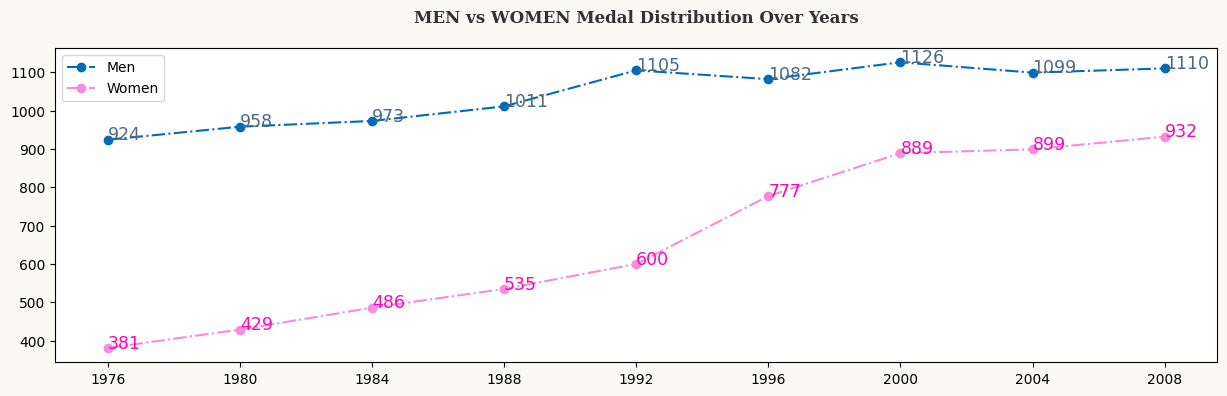

In [201]:
fig = plt.figure(figsize=(15,20),facecolor='#faf9f4')
gs = fig.add_gridspec(4,1)
gs.update(wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])

year,medal_count = [],[]
for i,j in sorted(medals.items()):
    year.append(i)
    medal_count.append(medals[i]['Men'])
ax1.plot(year,medal_count,marker='o',zorder=3,color='#006BB8',ls='-.')
for i,j in zip(year, medal_count):
    ax1.annotate(f'{j:0.0f}',xy=(i,j), color='#4B6980',fontsize=12.5)
    
year,medal_count = [],[]
for i,j in sorted(medals.items()):
    year.append(i)
    medal_count.append(medals[i]['Women'])
ax1.plot(year,medal_count,marker='o',zorder=3,color='#F58CDC',ls='-.')
for i,j in zip(year, medal_count):
    ax1.annotate(f'{j:0.0f}',xy=(i,j), color='#F20ABB',fontsize=12.5)
    
ax1.text(1992,1230,'MEN vs WOMEN Medal Distribution Over Years',fontsize=12, fontweight='bold', fontfamily='serif',color="#323232", horizontalalignment='center')
ax1.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax1.legend(['Men','Women'])

plt.show()

# Impact of Geopolitical Events:
> **Moscow and Los Angeles Olympics Boycot**

In [202]:
for i,j in grouped_data_city:
    if str(i)[2:-3]=='Moscow':
        oly_1980 = j['Country'].value_counts()[:5]
        oly_1980['United States']=0
        oly_1980 = sorted(oly_1980.items(),reverse=True)
    elif str(i)[2:-3]=='Los Angeles':
        oly_1984 = j['Country'].value_counts()[:5]
        oly_1984['Soviet Union']=0
        oly_1984 = sorted(oly_1984.items(),reverse=True)
        
print(oly_1980, oly_1984)

[('United States', 0), ('Soviet Union', 442), ('Romania', 72), ('Hungary', 61), ('East Germany', 260), ('Bulgaria', 94)] [('Yugoslavia', 87), ('West Germany', 157), ('United States', 333), ('Soviet Union', 0), ('Romania', 106), ('Canada', 86)]


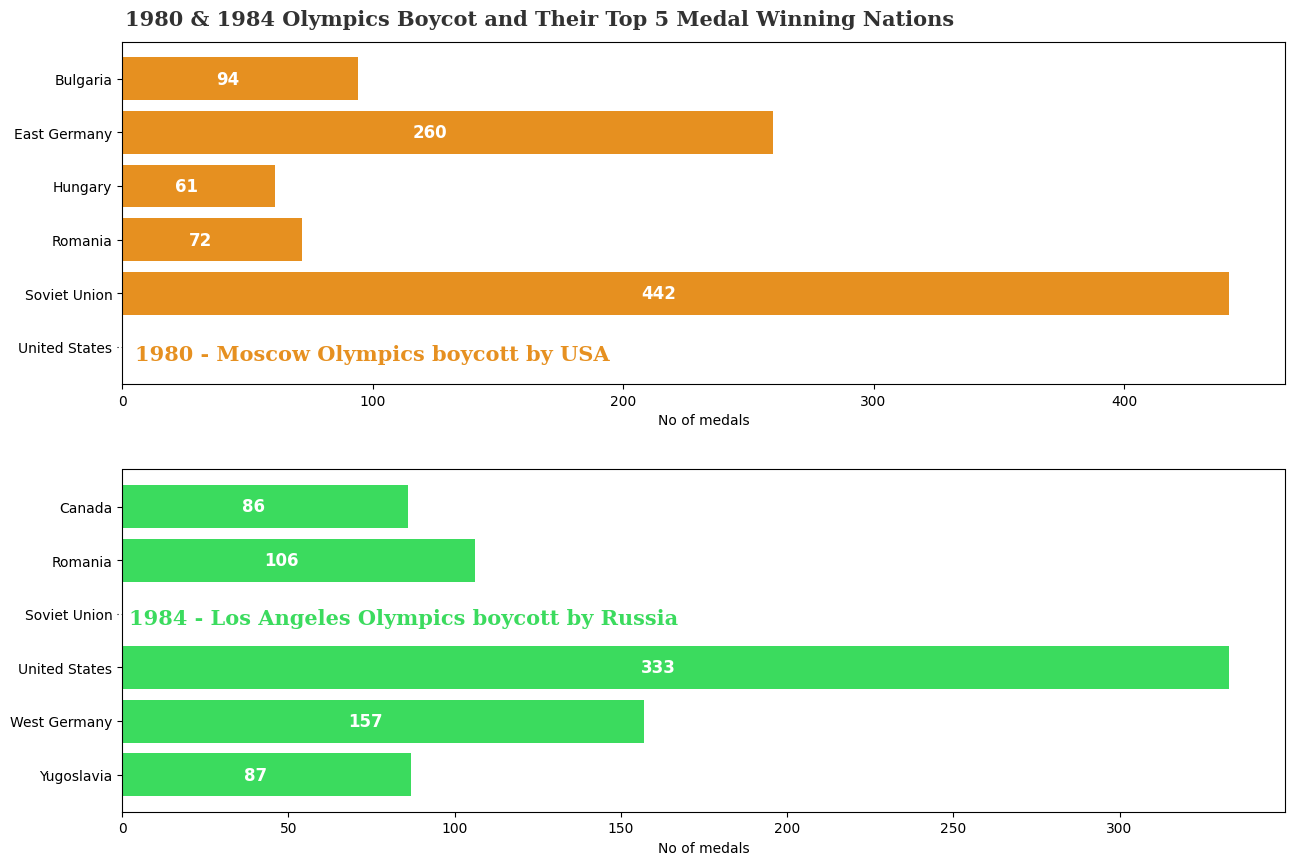

In [232]:
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,1)
gs.update(wspace=0.25, hspace=0.25)

ax0 = fig.add_subplot(gs[0, 0:])
ax1 = fig.add_subplot(gs[1, 0:])


# Ax4 - horizontal bar plot
X = [p[1] for p in oly_1980]
Y = [p[0] for p in oly_1980]
ax0.barh(Y,X,color='#E69020')
ax0.text(1,6,'1980 & 1984 Olympics Boycot and Their Top 5 Medal Winning Nations',fontsize=15, fontweight='bold', fontfamily='serif',color="#323232", horizontalalignment='left')
ax0.text(100,-0.25,'1980 - Moscow Olympics boycott by USA',fontsize=15, fontweight='bold', fontfamily='serif',color="#E69020", horizontalalignment='center')
for i,j in zip(Y, X):
    ax0.annotate(f'{j:0.0f}',xy=(j/2,i), color='#FFFFFF', horizontalalignment='right', verticalalignment='center',fontsize=12, fontweight='bold')
ax0.set_xlabel("No of medals")

# Ax6 - horizontal bar plot
X = [p[1] for p in oly_1984]
Y = [p[0] for p in oly_1984]
ax1.barh(Y,X,color='#3BDB5E')
ax1.text(2,2.8,'1984 - Los Angeles Olympics boycott by Russia',fontsize=15, fontweight='bold', fontfamily='serif',color="#3BDB5E", horizontalalignment='left')
for i,j in zip(Y, X):
    ax1.annotate(f'{j:0.0f}',xy=(j/2,i), color='#FFFFFF', horizontalalignment='right', verticalalignment='center',fontsize=12, fontweight='bold')
ax1.set_xlabel("No of medals")

plt.show()

# Overall Trend in Olympics Based on Medal Count
> **(b) Visualize the overall trends in data, such as total medals won over the years.**

In [204]:
medal_count = dict()

year_data = df.groupby(['Year'])
for i,j in year_data:
    medal_count[int(str(i)[1:-2])] = {'Gold':0,'Silver':0,'Bronze':0}
    temp_dict = dict(j['Medal'].value_counts())
    for medal in ['Gold','Silver','Bronze']:
        try:
            medal_count[int(str(i)[1:-2])][medal]= temp_dict[medal]
        except:
            pass

print(medal_count)

{1976: {'Gold': 429, 'Silver': 429, 'Bronze': 447}, 1980: {'Gold': 460, 'Silver': 455, 'Bronze': 472}, 1984: {'Gold': 483, 'Silver': 476, 'Bronze': 500}, 1988: {'Gold': 506, 'Silver': 505, 'Bronze': 535}, 1992: {'Gold': 558, 'Silver': 551, 'Bronze': 596}, 1996: {'Gold': 615, 'Silver': 610, 'Bronze': 634}, 2000: {'Gold': 663, 'Silver': 667, 'Bronze': 685}, 2004: {'Gold': 659, 'Silver': 660, 'Bronze': 679}, 2008: {'Gold': 669, 'Silver': 663, 'Bronze': 710}}


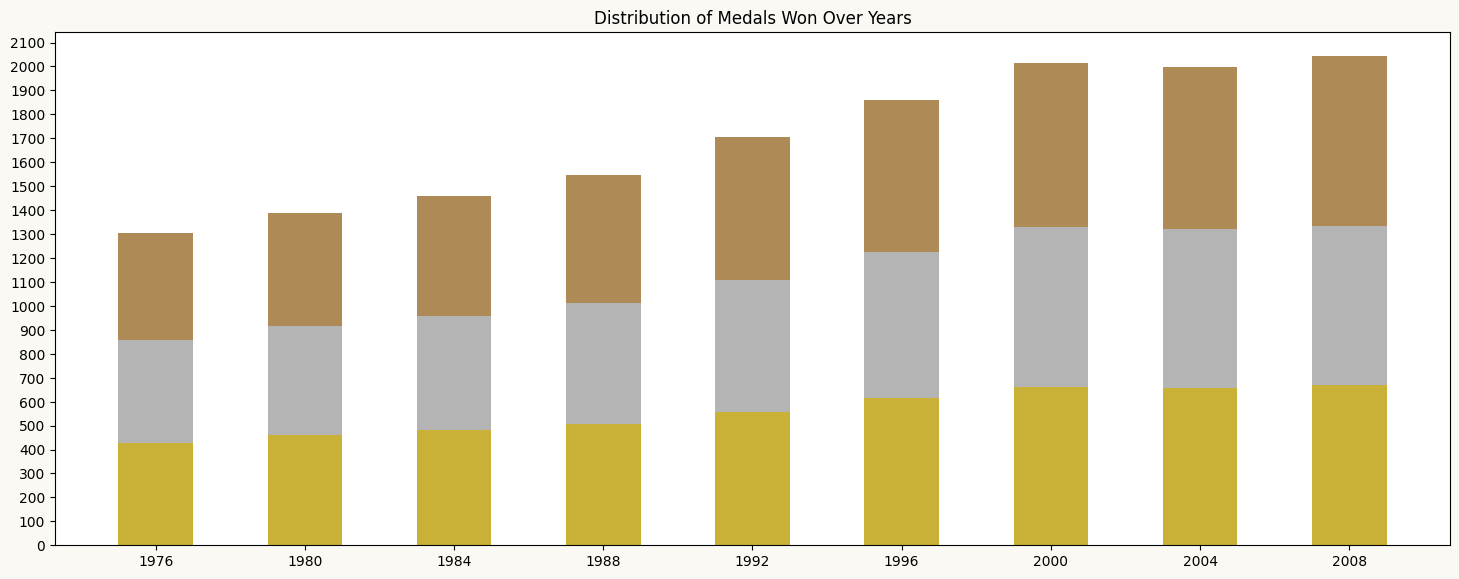

In [205]:
fig = plt.figure(figsize=(18,15),facecolor='#faf9f4')
gs = fig.add_gridspec(2,1)
gs.update(wspace=0.25, hspace=0.25)

func = lambda x : x['Gold']+x['Silver']+x['Bronze']
gold = lambda x : x['Gold']
silver = lambda x : x['Silver']+x['Gold']

ax1 = fig.add_subplot(gs[0, 0:]) 

ax1.bar(medal_count.keys(),list(map(func,medal_count.values())),width=2 ,color='#AD8A56')
ax1.bar(list(medal_count.keys()),list(map(silver,medal_count.values())) ,width=2 , color ='#B4B4B4')
ax1.bar(list(medal_count.keys()),list(map(gold,medal_count.values())) ,width=2 , color ='#C9B037')
ax1.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(100))

plt.title('Distribution of Medals Won Over Years')
plt.show()

# Distribution of Medals: Gold, Siver & Bronze 
> **(a). Conduct initial explorations to understand the distribution of medals, number of participating nations, and other key metrics.**

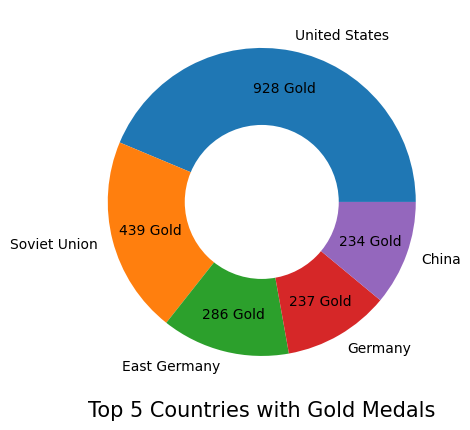

In [229]:
gold_country = df[df.Medal == 'Gold'].groupby(['Country']).Medal.size()
gold_top_5 = gold_country.sort_values(ascending = False)[:5]
plt.figure(figsize=(7,5))
top_10_gold_pie = plt.pie(gold_top_5, labels=gold_top_5.index, 
                             autopct= lambda x: f'{x*sum(gold_top_5.values)/100 :.0f} Gold', pctdistance=0.75)
pr_pie_circle = plt.Circle((0,0), 0.5, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 5 Countries with Gold Medals', fontsize=15)

plt.show()

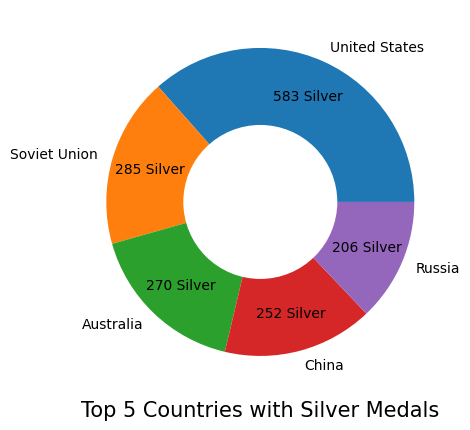

In [228]:
silver_country = df[df.Medal == 'Silver'].groupby(['Country']).Medal.size()
silver_top_5 = silver_country.sort_values(ascending = False)[:5]
plt.figure(figsize=(7,5))
top_10_gold_pie = plt.pie(silver_top_5, labels=silver_top_5.index, 
                             autopct= lambda x: f'{x*sum(silver_top_5.values)/100 :.0f} Silver', pctdistance=0.75)
pr_pie_circle = plt.Circle((0,0), 0.5, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 5 Countries with Silver Medals', fontsize=15)

plt.show()

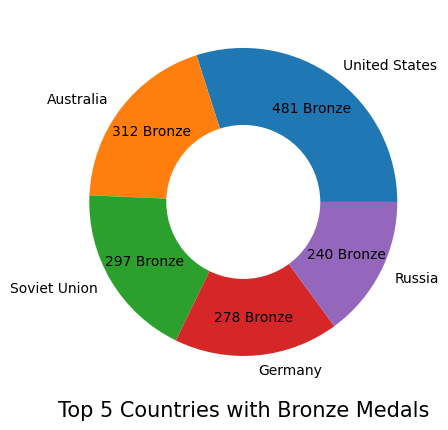

In [227]:
bronze_country = df[df.Medal == 'Bronze'].groupby(['Country']).Medal.size()
bronze_top_5 = bronze_country.sort_values(ascending = False)[:5]
plt.figure(figsize=(7,5))
top_10_gold_pie = plt.pie(bronze_top_5, labels=bronze_top_5.index, 
                             autopct= lambda x: f'{x*sum(bronze_top_5.values)/100 :.0f} Bronze', pctdistance=0.75)
pr_pie_circle = plt.Circle((0,0), 0.5, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 5 Countries with Bronze Medals', fontsize=15)

plt.show()

# Sport and Event-Specific Trends:

> **(a) Individual Sports: Dominant Nations**

In [251]:
grouped_data_sport = df.groupby(['Sport'])
dnation_sport = dict()

for i,j in grouped_data_sport:
    for k,l in j.groupby(['Country']):
        dnation_sport[str(i)[2:-3]] = dict(j['Country'].value_counts()[:3])
        
dnation_sport

{'Aquatics': {'United States': 578, 'Australia': 239, 'Russia': 125},
 'Archery': {'Korea, South': 52, 'United States': 19, 'China': 15},
 'Athletics': {'United States': 299, 'Soviet Union': 115, 'East Germany': 107},
 'Badminton': {'China': 47, 'Korea, South': 31, 'Indonesia': 26},
 'Baseball': {'Cuba': 111, 'United States': 68, 'Japan': 64},
 'Basketball': {'United States': 192, 'Yugoslavia': 84, 'Soviet Union': 72},
 'Boxing': {'Cuba': 56, 'United States': 42, 'Russia': 20},
 'Canoe / Kayak': {'Germany': 96, 'Hungary': 93, 'East Germany': 44},
 'Cycling': {'Australia': 54, 'United Kingdom': 47, 'France': 44},
 'Equestrian': {'United States': 73, 'Germany': 53, 'West Germany': 42},
 'Fencing': {'France': 115, 'Italy': 110, 'Hungary': 59},
 'Football': {'Brazil': 109, 'United States': 68, 'Soviet Union': 54},
 'Gymnastics': {'Romania': 116, 'China': 97, 'United States': 95},
 'Handball': {'Korea, South': 96, 'Soviet Union': 85, 'Yugoslavia': 58},
 'Hockey': {'Netherlands': 159, 'Austr

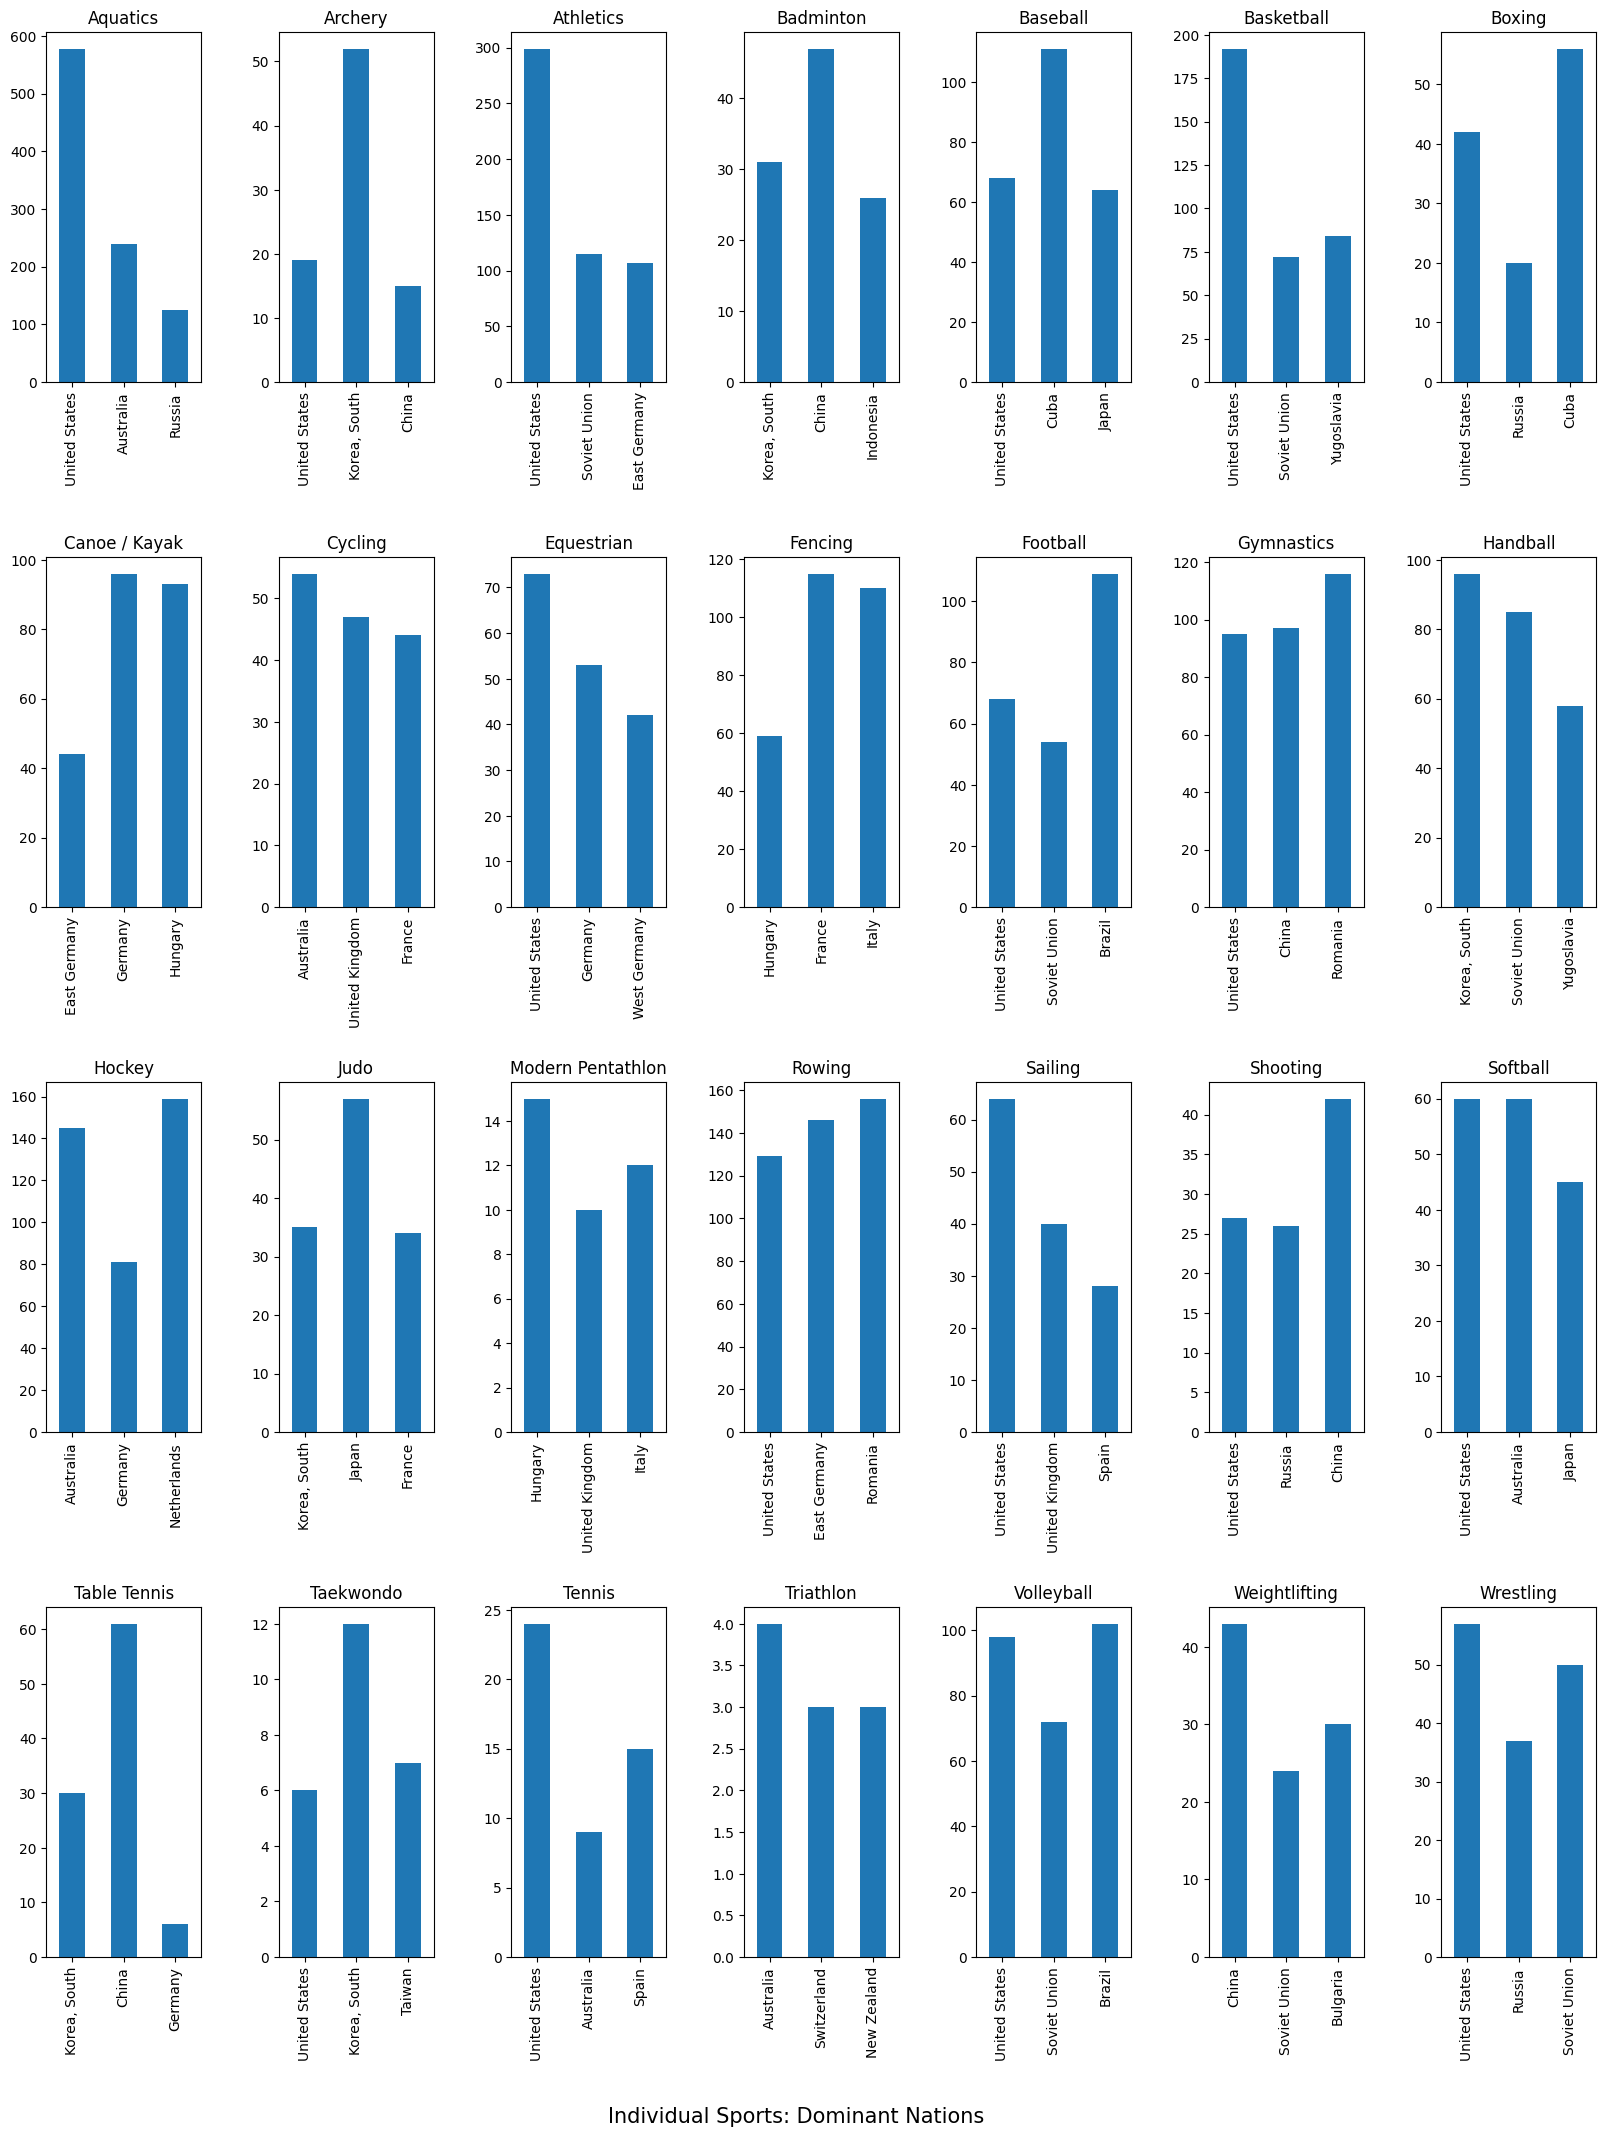

In [252]:
fig = plt.figure(figsize=(20,25))
gs = fig.add_gridspec(4,7)
gs.update(wspace=0.5, hspace=0.5)

title = list(dnation_sport.keys())

data = pd.DataFrame.from_dict(dnation_sport)

k = 0
for i in range(0,7):
    j = 0
    new_df = data[title[i]]
    new_df = new_df.dropna()
    fig.add_subplot(gs[j,k])
    new_df.plot(x=title[i], kind='bar', title=title[i]) 
    k += 1
    
k = 0
for i in range(7,14):
    j = 1
    new_df = data[title[i]]
    new_df = new_df.dropna()
    fig.add_subplot(gs[j,k])
    new_df.plot(x=title[i], kind='bar', title=title[i]) 
    k += 1
    
k = 0
for i in range(14,21):
    j = 2
    new_df = data[title[i]]
    new_df = new_df.dropna()
    fig.add_subplot(gs[j,k])
    new_df.plot(x=title[i], kind='bar', title=title[i]) 
    k += 1
    
k = 0
for i in range(21,28):
    j = 3
    new_df = data[title[i]]
    new_df = new_df.dropna()
    fig.add_subplot(gs[j,k])
    new_df.plot(x=title[i], kind='bar', title=title[i]) 
    k += 1

fig.suptitle('Individual Sports: Dominant Nations', fontsize=15, y=0.05)
plt.show()

# Sport and Event-Specific Trends:

> **(b) Introduction or Removal of Sports**

In [41]:
grouped_data = df.groupby(['Year'])
data = dict()

for i,j in grouped_data:
    for k,l in j.groupby(['Discipline']):
        data[i] = dict(j['Discipline'].value_counts())
        
table = pd.DataFrame.from_dict(data)

table

,1976.0,1980.0,1984.0,1988.0,1992.0,1996.0,2000.0,2004.0,2008.0
Rowing,162.0,162.0,162.0,159.0,156.0,144.0,144.0,144.0,144
Athletics,147.0,150.0,161.0,163.0,178.0,180.0,184.0,183.0,177
Swimming,114.0,114.0,132.0,142.0,169.0,181.0,185.0,185.0,200
Handball,84.0,84.0,85.0,84.0,84.0,96.0,90.0,88.0,85
Artistic G.,74.0,75.0,75.0,75.0,77.0,80.0,72.0,72.0,72
Basketball,72.0,72.0,72.0,72.0,72.0,72.0,72.0,70.0,72
Volleyball,72.0,72.0,72.0,72.0,72.0,72.0,72.0,71.0,72
Fencing,71.0,70.0,72.0,72.0,72.0,60.0,66.0,61.0,62
Canoe / Kayak F,57.0,57.0,69.0,69.0,69.0,69.0,69.0,69.0,69
Football,51.0,51.0,51.0,61.0,37.0,104.0,108.0,98.0,108


In [42]:
table.loc['Synchronized S.':'BMX']

,1976.0,1980.0,1984.0,1988.0,1992.0,1996.0,2000.0,2004.0,2008.0
Synchronized S.,NaN,NaN,9.0,9.0,9.0,30.0,30.0,33.0,33
Rhythmic G.,NaN,NaN,3.0,3.0,3.0,21.0,21.0,21.0,21
Tennis,NaN,NaN,NaN,24.0,24.0,18.0,18.0,16.0,18
Table Tennis,NaN,NaN,NaN,18.0,24.0,18.0,18.0,18.0,24
Baseball,NaN,NaN,NaN,NaN,60.0,60.0,72.0,71.0,72
Badminton,NaN,NaN,NaN,NaN,24.0,24.0,24.0,24.0,24
Canoe / Kayak S,NaN,NaN,NaN,NaN,15.0,15.0,15.0,15.0,15
Softball,NaN,NaN,NaN,NaN,NaN,45.0,45.0,45.0,45
Beach volley.,NaN,NaN,NaN,NaN,NaN,12.0,12.0,12.0,12
Mountain Bike,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6


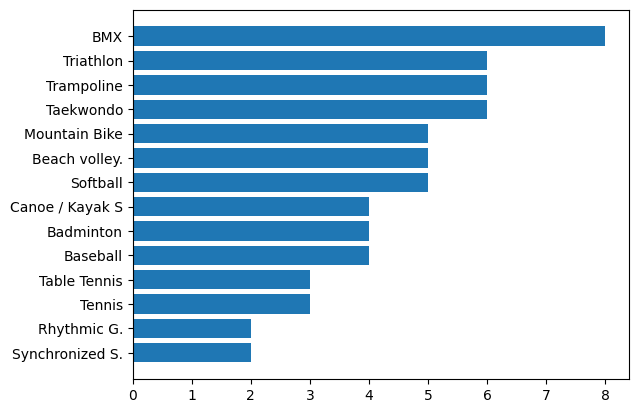

In [74]:
table = table.transpose()

test = dict(table.isna().sum())
lst_x = []
lst_y = []

for i in test:
    if test[i] != 0:
        lst_x.append(i)
        lst_y.append(test[i])

plt.barh(lst_x,lst_y)
plt.show()


In [75]:
test = dict(table.isna().sum())
lst_x = []
lst_y = []

for i in test:
    if test[i] != 0:
        lst_x.append(i)
        lst_y.append(test[i])
        
for idx,i in enumerate(lst_y):
    if i == 2:
        lst_y[idx] = 1984
    if i == 3:
        lst_y[idx] = 1988
    if i == 4:
        lst_y[idx] = 1992
    if i == 5:
        lst_y[idx] = 1996
    if i == 6:
        lst_y[idx] = 2000
    if i == 8:
        lst_y[idx] = 2008
        
data = pd.DataFrame((list(zip(lst_x, lst_y))), columns =['Sport', 'Year Added'])

data

,Sport,Year Added
0,Synchronized S.,1984
1,Rhythmic G.,1984
2,Tennis,1988
3,Table Tennis,1988
4,Baseball,1992
5,Badminton,1992
6,Canoe / Kayak S,1992
7,Softball,1996
8,Beach volley.,1996
9,Mountain Bike,1996
